In [32]:
import pandas as pd
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")
import seaborn as sns

In [13]:
df1 = pd.read_csv("03_Delivery.csv", encoding="cp949")

In [14]:
df1.head(1)

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227


지난 시간에는 주문일만 분석했다.
이번 시간에는 배송시작일과 배송완료일을 비교해서 분석해보자.
- 시작일과 완료일 처리해서 배송 기간을 계산해보자

In [15]:
df1["주문일(datetime)"] = pd.to_datetime(df1["주문일"], format="%Y%m%d")

In [18]:
# 주중, 주말 판매 추이 비교
df1["주문요일"] = df1["주문일(datetime)"].dt.day_name()

In [19]:
# 주문요일 col에는 주중, 주말 data가 섞여 있다.
df1["주문요일"].value_counts()

Monday       9903
Wednesday    8737
Thursday     8697
Tuesday      8404
Friday       6665
Sunday       2429
Saturday     1914
Name: 주문요일, dtype: int64

In [21]:
# 주중, 주말 나눠서 매출액 비교해보자, 편차가 큰지 확인해보자.
# replace() : 원래 데이터에 있던 특정 숫자, 문자를 다른 값으로 변환해줄 수 있다.
# key : 지금 있는 데이터 val
# value: 바꿀 데이터 val
df1["주중/주말"] = df1["주문요일"].replace({"Monday":"주중", "Tuesday": "주중", 
                                            "Wednesday": "주중", "Thursday": "주중", 
                                            "Friday": "주중", "Saturday": "주말",
                                            "Sunday":"주말"})

In [24]:
# 주중, 주말 빈도수 확인해보자
df1["주중/주말"].value_counts()
# 주중 데이터가 주말 데이터의 10배 가까이 많다.
# 주말보다는 주중에 납품을 더 많이 해야하는구나.

주중    42406
주말     4343
Name: 주중/주말, dtype: int64

In [ ]:
# 주중 매출액 총압, 주말 매출액 비교
# 주중 판매량, 주말 판매량 차이가 큼을 바로 위에서 확인했다.
# 그래서 당연히 주중 매출액(상품구매금액의 총합)이 훨씬 더 클 것이다.
# 그럼에도 확인해볼 필요가 있다.
# 왜냐하면 위 value count는 판매개수나 판매금액이 아니기 때문이다.

In [25]:
## 주중, 주말 수량의 합 확인해보기
# 주중과 주말에 상품의 수량 : 주말에 몇개를 샀는가? 주중에 몇개를 샀는가?
# 그냥 데이터의 개수 (value count)와 다르다. 
# 1번 주문할 때 2개 이상 주문하는 고객들도 있기 떄문이다.
# 그래서 수량의 합이 더 큰 수가 나오는 것이 당연하다.
# pivot_table 사용해서 특정 col에 따른 수량 sum이나 상품구매금액 sum을 계산할 수 있다.
# aggfunc : 통계량을 계산하는 함수 설정
df1.pivot_table(index="주중/주말", values="수량", aggfunc="sum")

,수량
주중/주말,
주말,5149
주중,49878


In [26]:
## 판매금액의 합
# 이번에는 무엇이 계산되는 것인가?
# 주중과 주말의 상품구매금액 총액(매출액)
# 압도적으로 주중 매출액이 더 크다.
df1.pivot_table(index="주중/주말", values="상품구매금액", aggfunc="sum")

,상품구매금액
주중/주말,
주말,306863800
주중,2936027585


In [ ]:
# 평균 사용하면 주중에 비싼 물건사는지, 주말에 비싼 물건 사는지 확인해볼 수 있다.


In [27]:
# 1주일 중에 주중은 5일
# 주말은 2일 밖에 없다.

In [28]:
## 평균적으로 얼마를 구매했는가?를 계산해보자.
# 구매 1건 당 평균 금액이 주말 > 주중임을 확인할 수 있다. (조금 더 높다. 1400원 차이)
# 주문당 또는 구매당 구매하는 금액은 주중/주말 비슷하다.
# 여러분이 이런 것들을 주의깊게 보면서 분석해야 한다.
df1.pivot_table(index="주중/주말", values="상품구매금액", aggfunc="mean")

,상품구매금액
주중/주말,
주말,70657.103385
주중,69236.136042


In [29]:
# 이정도 파악할 수 있다.
# 고객들이 주말보다는 주중에 더 많이 우리 매장에서 물품을 사간다.
# 주중/ 주말 상관없이 한번 사갈 때는 비슷한 금액을 사간다.

<Axes: xlabel='주중/주말', ylabel='상품구매금액'>

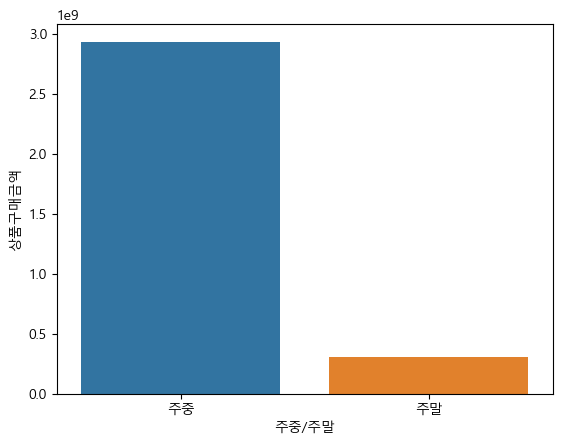

In [34]:
## 시각화
# 주중 상품 구매량이 더 많다.
sns.barplot(data=df1, x="주중/주말", y="상품구매금액", estimator=sum, errorbar=None)

<Axes: xlabel='주중/주말', ylabel='상품구매금액'>

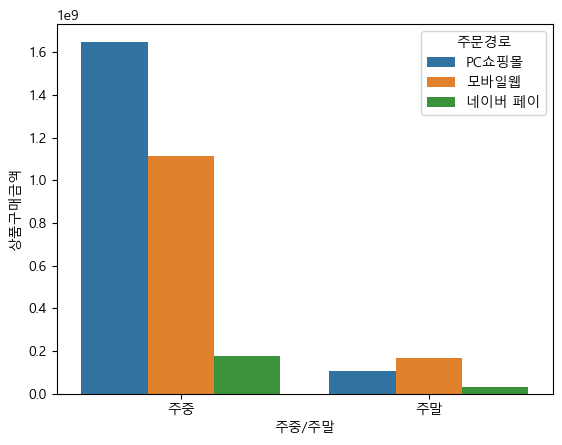

In [35]:
# 이거를 주문 경로에 대해서 나눠보자.
# hue="주문경로"를 추가해라.
# 주중/ 주말별 주문경로별 판매추이가 나타난다.
sns.barplot(data=df1, x="주중/주말", y="상품구매금액", estimator=sum, errorbar=None, hue="주문경로")
# 주중에는 pc 쇼핑몰로 구매하는 고객들이 가장 많다.
# 주말에는 모바일 웹으로 구매 하는 고객들이 가장 많다.
# 여기서 인사이트를 발견할 수 있다:
#  주중/주말에 따라서 고객들이 주문하는 경로가 차이가 있다.
#  주말에는 모바일웹으로 주문하는 고객이 가장 많고, 거기서 매출액 더 높게 잡히는구나.
# 이런거를 파악할 수 있다.

In [ ]:
# 배송시작일, 배송완료일을 이용해서 배송기간을 계산해보자.